# Rice Production vs. Methane Emitted from Rice Production
---
In our dataset from the IPCC (Intergovernmental Panel on Climate Change) and the FAO (Food and Agriculture Organization), \
we had a wealth of data that allowed a deeper look into global emissions of greenhouse gases. \
I wanted to look at the relationship between rice production and the methane emitted from that process. \
Rice is a global food staple, and a major contributor of methane, accounting for over 10% of all methane emissions world-wide annually.  

## Cause for Methane Production in Rice Cultivation:
---
Rice paddies or fields are flooded for a large portion of the year to eliminate the need for herbicides to treat the fields, \
as the weeds that compete with rice do not grow well in flooded soil, but rice does.\
The flooding of the soil produces large amounts of methane, due to microorganisms in the soil. 


In [33]:
# Import dependencies and files.
from ipynb.fs.full.emissions_analysis import main_df
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.stats import *
pd.options.display.float_format = '{:,.2f}'.format
continents_data = 'continents.csv'
continents = pd.read_csv(continents_data)
continents_clean = pd.DataFrame({'Country': continents['name'], 'Region': continents['region'], 'Sub-Region': continents['sub-region']})


In [29]:
# Linear Regression for Regional Rice Yields vs Methane Emissions. 
def lin_reg(x,y):
    x_values = x
    y_values = y
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x_values,regress_values,color='k')
    print(line_eq)
    print(f"The r-value is {rvalue}")

In [34]:
# Isolating relevant datapoints for analysis
merged_df = pd.merge(main_df, continents_clean, how='left')
yield_df = pd.DataFrame({'Country':merged_df['Country'],'Region': merged_df['Region'], 
                        'Sub-Region': merged_df['Sub-Region'],'Year': merged_df['Year'],
                        'Methane': merged_df['Rice Cultivation'],
                        'CO2 Released from Forestland': merged_df['Forestland'],
                        'Rice Yield': merged_df['rice_yield']})

# Further cleaning and data-wrangling/formatting
cleaned_yields = yield_df.dropna()
cleaned_yields.reset_index(drop=True)
cleaned_yields.set_index('Country')

,Region,Sub-Region,Year,Methane,CO2 Released from Forestland,Rice Yield
Country,,,,,,
Afghanistan,Asia,Southern Asia,1990,686.00,"-2,388.80",1.90
Afghanistan,Asia,Southern Asia,1991,678.16,"-2,388.80",1.94
Afghanistan,Asia,Southern Asia,1992,686.00,"-2,388.80",1.71
Afghanistan,Asia,Southern Asia,1993,686.00,"-2,388.80",1.71
Afghanistan,Asia,Southern Asia,1994,705.60,"-2,388.80",1.90
...,...,...,...,...,...,...
Zimbabwe,Africa,Sub-Saharan Africa,2016,7.41,"76,500.30",0.34
Zimbabwe,Africa,Sub-Saharan Africa,2017,7.95,"76,500.30",0.37
Zimbabwe,Africa,Sub-Saharan Africa,2018,8.14,"76,500.30",0.40


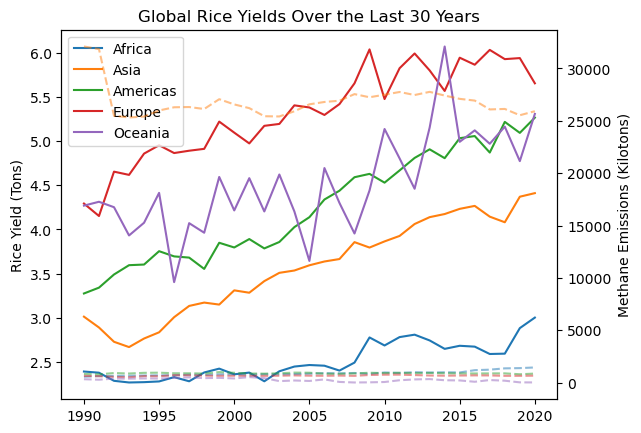

In [35]:
# Separate out regions for plotting
africa = cleaned_yields.loc[cleaned_yields['Region'] == 'Africa', ['Year','Rice Yield']]
africa_yields = africa.groupby('Year')['Rice Yield'].mean()
africa_ch4 = cleaned_yields.loc[cleaned_yields['Region'] == 'Africa', ['Year','Methane']]
africa_ch4_yields = africa_ch4.groupby('Year')['Methane'].mean()

americas = cleaned_yields.loc[cleaned_yields['Region'] == 'Americas', ['Year','Rice Yield']]
amer_yields = americas.groupby('Year')['Rice Yield'].mean()
americas_ch4 = cleaned_yields.loc[cleaned_yields['Region'] == 'Americas', ['Year','Methane']]
amer_ch4_yields = americas_ch4.groupby('Year')['Methane'].mean()

asia = cleaned_yields.loc[cleaned_yields['Region'] == 'Asia', ['Year','Rice Yield']]
asian_yields = asia.groupby('Year')['Rice Yield'].mean()
asia_ch4 = cleaned_yields.loc[cleaned_yields['Region'] == 'Asia', ['Year','Methane']]
asian_ch4_yields = asia_ch4.groupby('Year')['Methane'].mean()

europe = cleaned_yields.loc[cleaned_yields['Region'] == 'Europe', ['Year','Rice Yield']]
euro_yields = europe.groupby('Year')['Rice Yield'].mean()
europe_ch4 = cleaned_yields.loc[cleaned_yields['Region'] == 'Europe', ['Year','Methane']]
euro_ch4_yields = europe_ch4.groupby('Year')['Methane'].mean()

ocean = cleaned_yields.loc[cleaned_yields['Region'] == 'Oceania', ['Year','Rice Yield']]
ocean_yields = ocean.groupby('Year')['Rice Yield'].mean()
ocean_ch4 = cleaned_yields.loc[cleaned_yields['Region'] == 'Oceania', ['Year','Methane']]
ocean_ch4_yields = ocean_ch4.groupby('Year')['Methane'].mean()

# Plotting and formatting
fig1, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(africa_yields, label='Africa'), ax1.plot(asian_yields, label='Asia'), ax1.plot(amer_yields, label='Americas'), \
ax1.plot(euro_yields, label='Europe'), ax1.plot(ocean_yields, label='Oceania'), \
ax2.plot(africa_ch4_yields, label='Africa CH4', alpha=.5, linestyle='dashed'), \
ax2.plot(asian_ch4_yields, label='Asia CH4', alpha=.5, linestyle='dashed'), \
ax2.plot(amer_ch4_yields, label='Americas CH4', alpha=.5,linestyle='dashed'), \
ax2.plot(euro_ch4_yields, label='European CH4', alpha=.5, linestyle='dashed'), \
ax2.plot(ocean_ch4_yields, label='Oceania CH4', alpha=.5, linestyle='dashed')
ax1.legend()
ax1.set_ylabel('Rice Yield (Tons)')
ax2.set_ylabel('Methane Emissions (Kilotons)')
plt.title('Global Rice Yields Over the Last 30 Years')
plt.show()

## Methane emissions seem to have a weak link to rice yields.
--- 
Over the last thirty years, methane emissions have remained relatively stable, while rice yields have climbed steadily. \
The outlier in this figure is Asia. As a region, they are 4th in rice production, but first by a considerable margin in \
methane emissions from rice production. 

In [36]:
# Normality test to check if regression is appropriate.
print(normaltest(asian_yields))
print(normaltest(asian_ch4_yields))

NormaltestResult(statistic=6.849209309902813, pvalue=0.032562151730202)
NormaltestResult(statistic=29.820182704165866, pvalue=3.346798773184099e-07)


y = -128.83x + 27306.38
The r-value is -0.04426136297378298


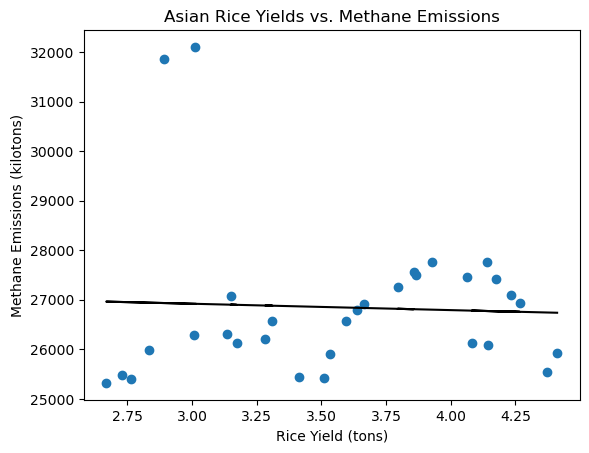

In [25]:
# Scatter plot of Asian Rice data points as backdrop for linear regression.
scatterx2 = asian_yields
scattery2 = asian_ch4_yields
plt.ylabel('Methane Emissions (kilotons)')
plt.xlabel('Rice Yield (tons)')
lin_reg(scatterx2,scattery2)
plt.title('Asian Rice Yields vs. Methane Emissions')
plt.scatter(scatterx2,scattery2)
plt.show()

## Looking more closely

Further investigation seems to show that there is in fact a relationship between rice yields and methane production. \
The seemingly weak relationship shown in the Linear Regression of Asia data points seems to suggest that the member nations \
are resistant to switching or augmenting rice cultivation methods.


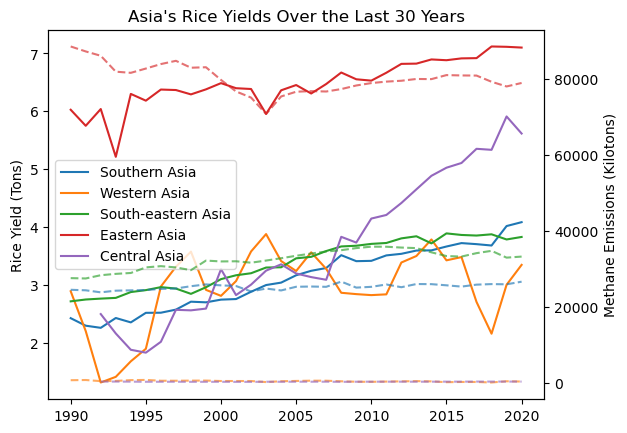

In [26]:
# Separate out Asian sub-regions for plotting.
south_asia = cleaned_yields.loc[cleaned_yields['Sub-Region'] == 'Southern Asia', ['Year','Rice Yield']]
south_asia_yields = south_asia.groupby('Year')['Rice Yield'].mean()
south_asia_ch4 = cleaned_yields.loc[cleaned_yields['Sub-Region'] == 'Southern Asia', ['Year','Methane']]
south_asia_ch4_yields = south_asia_ch4.groupby('Year')['Methane'].mean()

west_asia = cleaned_yields.loc[cleaned_yields['Sub-Region'] == 'Western Asia', ['Year','Rice Yield']]
west_asia_yields = west_asia.groupby('Year')['Rice Yield'].mean()
west_asia_ch4 = cleaned_yields.loc[cleaned_yields['Sub-Region'] == 'Western Asia', ['Year','Methane']]
west_asia_ch4_yields = west_asia_ch4.groupby('Year')['Methane'].mean()

se_asia = cleaned_yields.loc[cleaned_yields['Sub-Region'] == 'South-eastern Asia', ['Year','Rice Yield']]
se_asia_yields = se_asia.groupby('Year')['Rice Yield'].mean()
se_asia_ch4 = cleaned_yields.loc[cleaned_yields['Sub-Region'] == 'South-eastern Asia', ['Year','Methane']]
se_asia_ch4_yields = se_asia_ch4.groupby('Year')['Methane'].mean()

east_asia = cleaned_yields.loc[cleaned_yields['Sub-Region'] == 'Eastern Asia', ['Year','Rice Yield']]
east_asia_yields = east_asia.groupby('Year')['Rice Yield'].mean()
east_asia_ch4 = cleaned_yields.loc[cleaned_yields['Sub-Region'] == 'Eastern Asia', ['Year','Methane']]
east_asia_ch4_yields = east_asia_ch4.groupby('Year')['Methane'].mean()

cent_asia = cleaned_yields.loc[cleaned_yields['Sub-Region'] == 'Central Asia', ['Year','Rice Yield']]
cent_asia_yields = cent_asia.groupby('Year')['Rice Yield'].mean()
cent_asia_ch4 = cleaned_yields.loc[cleaned_yields['Sub-Region'] == 'Central Asia', ['Year','Methane']]
cent_asia_ch4_yields = cent_asia_ch4.groupby('Year')['Methane'].mean()

# Plotting and formatting
fig2, ax3 = plt.subplots()
ax4 = ax3.twinx()
ax3.plot(south_asia_yields, label='Southern Asia'), ax3.plot(west_asia_yields, label='Western Asia'), \
ax3.plot(se_asia_yields, label='South-eastern Asia'), ax3.plot(east_asia_yields, label='Eastern Asia'), \
ax3.plot(cent_asia_yields, label='Central Asia'), ax4.plot(south_asia_ch4_yields, alpha=.65, linestyle='dashed'), \
ax4.plot(west_asia_ch4_yields, alpha=.65, linestyle='dashed'), ax4.plot(se_asia_ch4_yields, alpha=.65, linestyle='dashed'), \
ax4.plot(east_asia_ch4_yields, alpha=.65, linestyle='dashed'), ax4.plot(cent_asia_ch4_yields, alpha=.65, linestyle='dashed')
ax3.legend(loc='best')
ax3.set_ylabel('Rice Yield (Tons)')
ax4.set_ylabel('Methane Emissions (Kilotons)')
plt.title("Asia's Rice Yields Over the Last 30 Years")
plt.show()

In [27]:
# Culprit finding. 
east_asia_members = cleaned_yields.loc[cleaned_yields['Sub-Region'] == 'Eastern Asia', 'Country'].unique()
east_asia_members

array(['China', 'Japan'], dtype=object)

## The biggest offenders are in Eastern Asia.
According to the World Bank, rice production in Asia accounts for between 25% and 33% of the region's methane production. 
The 'dirtiest' rice production occurs in Eastern Asia.

## There are only two countries in this sub-region; China and Japan. 
According to the National Bureau of Statistics, China accounts for 29% of the global methane production through rice cultivation. 
